In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from itertools import combinations

import warnings 

warnings.filterwarnings("ignore")


# 生成示例数据
# df = pd.read_csv("./test-out/s9_cluster.csv")
# 生成示例数据
df = pd.read_csv("./repro-out/pred_nonoisy_1000.csv")


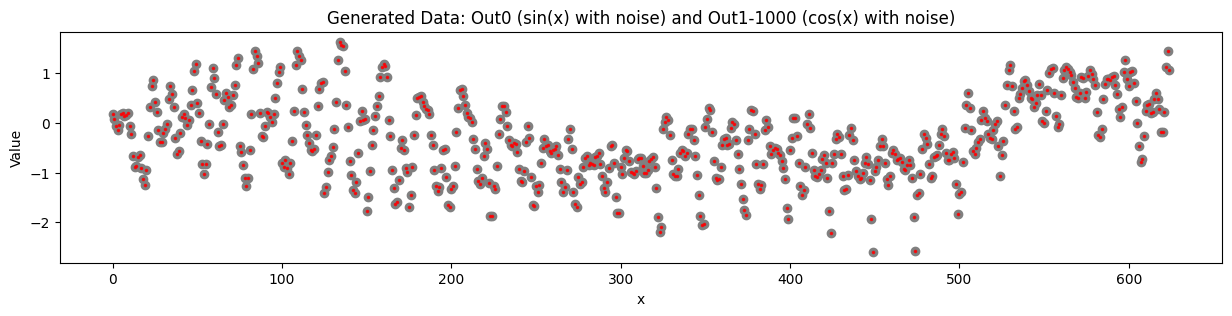

In [2]:

out0 =  pd.read_csv("pred_nonoisy_initial.csv")
# df["Out0"]=out0
x= df.index
data = df

# 绘制图片
plt.figure(figsize=(15, 3))

# 绘制Out0数据
plt.scatter(x, out0, label='Single data', color='grey')


# 绘制Out1到Out5数据作为示例
for i in range(1, 6):
    plt.scatter(x=x, y=out0.values, alpha=0.4,s=2,label=f'Outputs the {i} time of reproduction')
plt.scatter(x=x, y=out0.values, alpha=0.8,c='red',s=2, label='initial outputs')

# plt.legend()
plt.xlabel('x')
plt.ylabel('Value')
plt.title('Generated Data: Out0 (sin(x) with noise) and Out1-1000 (cos(x) with noise)')
plt.show()

In [3]:
# data = data.iloc[:, 1:1001]
data

,Out1,Out2,Out3,Out4,Out5,Out6,Out7,Out8,Out9,Out10,...,Out991,Out992,Out993,Out994,Out995,Out996,Out997,Out998,Out999,Out1000
0,0.185250,0.177066,0.189705,0.186676,0.184196,0.159746,0.168883,0.146474,0.175389,0.191059,...,0.174605,0.152058,0.194945,0.196485,0.156807,0.146290,0.155748,0.191010,0.189409,0.194694
1,0.081142,0.086035,0.083068,0.094590,0.094232,0.061974,0.080587,0.082416,0.099359,0.087013,...,0.068324,0.076299,0.067104,0.081712,0.061277,0.067722,0.078999,0.067744,0.080813,0.078838
2,-0.080085,-0.069942,-0.064665,-0.085159,-0.070402,-0.085223,-0.059094,-0.072522,-0.059615,-0.058340,...,-0.062928,-0.070329,-0.089487,-0.079262,-0.058887,-0.065437,-0.085444,-0.055374,-0.091552,-0.046796
3,-0.132535,-0.132380,-0.098108,-0.134839,-0.127942,-0.163774,-0.103788,-0.141042,-0.156474,-0.129773,...,-0.097650,-0.140136,-0.157226,-0.115425,-0.126651,-0.132699,-0.108044,-0.112185,-0.173213,-0.121282
4,-0.047175,-0.043056,0.035865,-0.021890,-0.004382,-0.051877,-0.028187,-0.054327,-0.061780,-0.002494,...,0.039455,-0.013764,-0.041438,-0.023617,-0.006772,-0.089280,-0.033985,0.031703,-0.071382,-0.040690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,-0.222068,-0.177877,-0.220995,-0.213960,-0.187261,-0.143435,-0.100701,-0.213639,-0.185494,-0.135694,...,-0.228301,-0.213950,-0.195920,-0.165181,-0.185662,-0.148092,-0.113295,-0.094329,-0.026241,-0.176068
621,0.233864,0.186508,0.202762,0.134292,0.269654,0.109316,0.345821,0.171622,0.152107,0.205870,...,0.151251,0.141344,0.115692,0.174803,0.060142,0.205063,0.260211,0.249305,0.243994,0.094262
622,1.090164,1.045711,1.050112,1.040082,1.127036,1.137390,1.152521,1.082324,1.056383,1.139751,...,1.111541,1.014697,1.084887,1.053750,1.096250,1.075759,1.130649,1.124217,1.083147,1.116740
623,1.346472,1.345827,1.281520,1.314070,1.424170,1.404262,1.445443,1.380028,1.350770,1.415211,...,1.404274,1.317594,1.334483,1.359550,1.385663,1.410526,1.387200,1.412813,1.356175,1.362623


In [4]:
# def calculate_proportion(values, lower_bound, upper_bound):
#     results = {}
#     common_count = 0
#     total_count = len(values)
#     for key, value in values.items():
#         if ((value >= lower_bound) & (value <= upper_bound)).any():
#             common_count += 1
        
#     common_ratio = common_count / total_count
#     return common_ratio *100

def calculate_proportion(values, lower_bound, upper_bound):
    # 确保所有输入都是 NumPy 数组
    if isinstance(values, pd.Series):
        values = values.to_numpy().flatten()
    if isinstance(lower_bound, pd.Series):
        lower_bound = lower_bound.to_numpy().flatten()
    if isinstance(upper_bound, pd.Series):
        upper_bound = upper_bound.to_numpy().flatten()
    
    common_count = 0
    total_count = len(values)
    
    for value, lb, ub in zip(values, lower_bound, upper_bound):
        # print(value, lb, ub)
        if lb <= value <= ub:
            common_count += 1
            
    return common_count / total_count*100

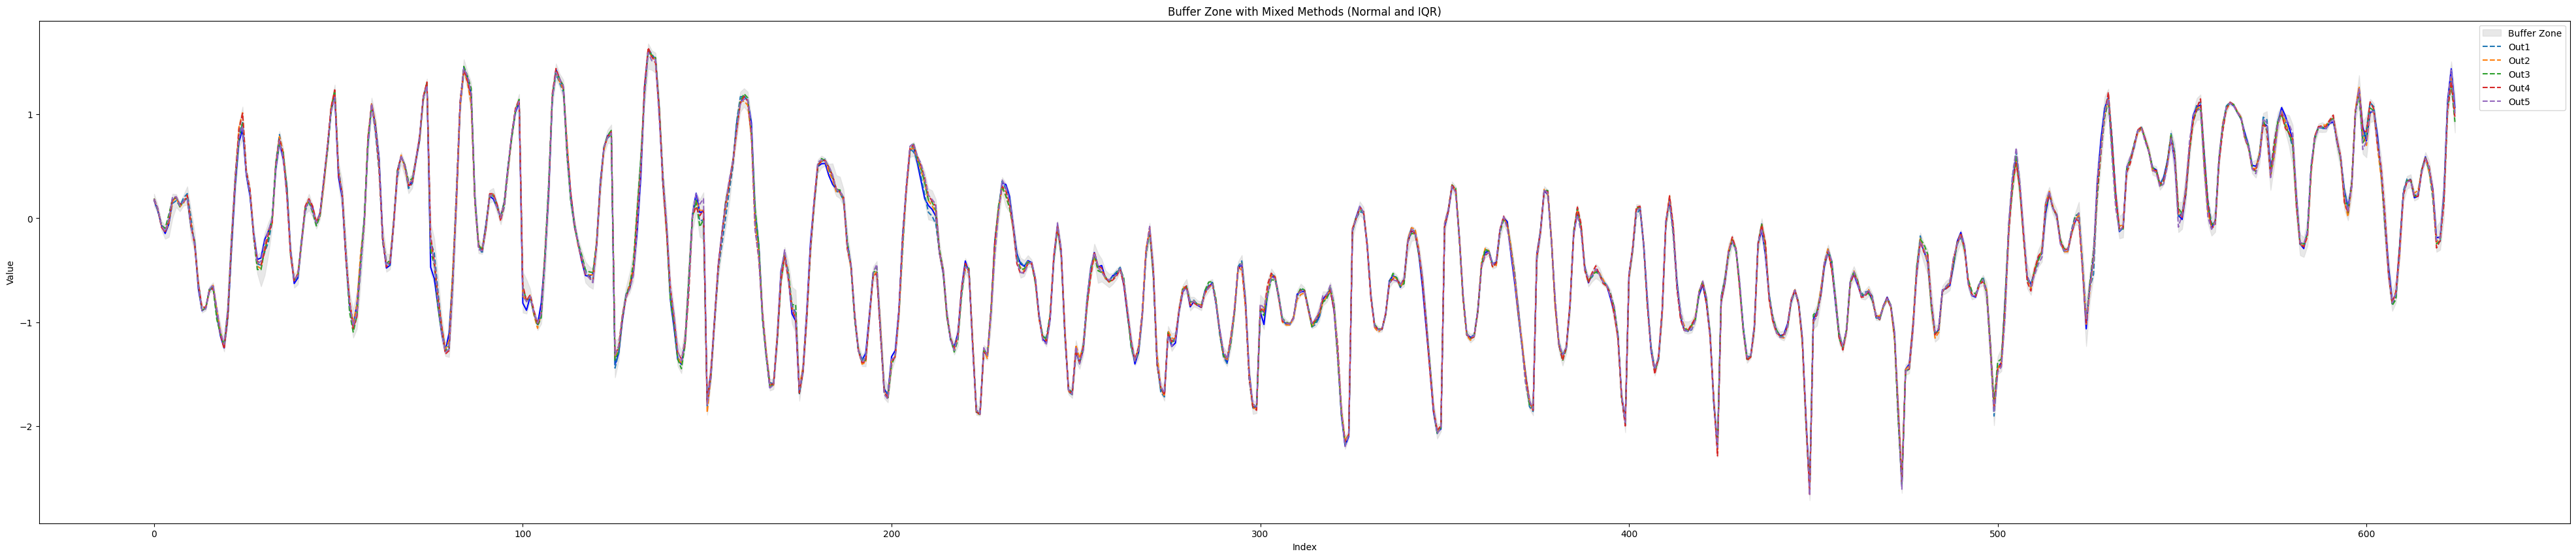

99.83999999999999


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# 初始化缓冲区上下界的数组
buffer_upper = []
buffer_lower = []

# 获取列的范围
start_col = data.columns.get_loc("Out1")
end_col = data.columns.get_loc("Out1000") + 1

# 对每一行进行正态性检验并计算缓冲区
for i in range(data.shape[0]):
    row_data = data.iloc[i, start_col:end_col]    
    buffer_upper.append(max(row_data))
    buffer_lower.append(min(row_data))

# 将缓冲区上下界转换为数组
buffer_upper = np.array(buffer_upper)
buffer_lower = np.array(buffer_lower)

# 生成x轴
x = np.arange(data.shape[0])

# 绘制缓冲区范围
plt.figure(figsize=(50, 10))
# 绘制Out0数据
plt.plot(x,out0, color='blue')

plt.fill_between(x, buffer_lower, buffer_upper, color='lightgray', alpha=0.5, label='Buffer Zone')

# 绘制部分数据列以示例
for i in range(5):
    plt.plot(x, data[f"Out{i+1}"], label=f'Out{i+1}', linestyle='--')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Buffer Zone with Mixed Methods (Normal and IQR)')
plt.show()
# 计算Out0在缓冲区内的比例
probability_within_buffer = calculate_proportion(out0.values,buffer_lower,buffer_upper)
print(probability_within_buffer)

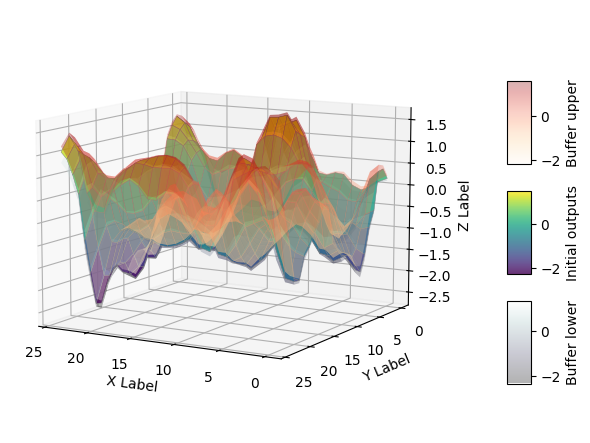

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm



# 初始化 predictions 为字典
array = out0.values
predictions = {'Shape_Out_0': array.reshape(25, 25)}

# 绘制三维图
fig = plt.figure(figsize=(12, 5.5))
ax = fig.add_subplot(111, projection='3d')

# 假设我们绘制 predictions 中的第一个 reshaped 数组
X, Y = np.meshgrid(np.arange(25), np.arange(25))
Z = predictions['Shape_Out_0']

# 确保缓冲区与 reshaped 数据形状一致
buffer_upper_reshape = buffer_upper.reshape(25, 25)
buffer_lower_reshape = buffer_lower.reshape(25, 25)

# 绘制曲面
surf = ax.plot_surface(X, Y, Z, cmap='viridis',color="grey", alpha=0.8, linewidth=0.3)

# 绘制缓冲区上下界，增加透明度使其更明显
lower_surf = ax.plot_surface(X, Y, buffer_lower_reshape, cmap='bone', alpha=0.3, linewidth=0.2)
upper_surf = ax.plot_surface(X, Y, buffer_upper_reshape, cmap='OrRd', alpha=0.3, linewidth=0.2)

# 增加垂直线以更明显显示波动范围
# for i in range(25):
#     for j in range(25):
#         ax.plot([X[i, j], X[i, j]], [Y[i, j], Y[i, j]], [buffer_lower_reshape[i, j], buffer_upper_reshape[i, j]], color='k', alpha=0.5)

# 调整视角
ax.view_init(elev=10, azim=120)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# 创建独立的颜色条轴并调整位置
fig.subplots_adjust(right=0.9)
cbar_ax1 = fig.add_axes([0.75, 0.6, 0.02, 0.15])
cbar_ax2 = fig.add_axes([0.75, 0.4, 0.02, 0.15])
cbar_ax3 = fig.add_axes([0.75, 0.2, 0.02, 0.15])

cbar1 = fig.colorbar(surf, cax=cbar_ax2)
cbar1.set_label('Initial outputs')
cbar2 = fig.colorbar(upper_surf, cax=cbar_ax1)
cbar2.set_label('Buffer upper')
cbar3 = fig.colorbar(lower_surf, cax=cbar_ax3)
cbar3.set_label('Buffer lower')

plt.show()

In [7]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import shapiro, gaussian_kde, iqr
# from astropy.stats import knuth_bin_width, bayesian_blocks
# import scipy.stats as stats


# # 定义不同组距计算方法
# def calculate_bin_count(data, method='fd'):
#     N = len(data)
#     if method == 'sqrt':
#         return int(np.sqrt(N))
#     elif method == 'sturges':
#         return int(np.log2(N) + 1)
#     elif method == 'fd':
#         bin_width = 2 * iqr(data) / np.cbrt(N)
#         return max(1, int((data.max() - data.min()) / bin_width))
#     elif method == 'scott':
#         bin_width = 3.5 * np.std(data) / np.cbrt(N)
#         return max(1, int((data.max() - data.min()) / bin_width))
#     else:
#         raise ValueError("Invalid method")

# # 定义自适应组距计算方法
# def calculate_adaptive_bins(data, method='knuth'):
#     if method == 'knuth':
#         bin_width = knuth_bin_width(data)
#         bins = int((data.max() - data.min()) / bin_width)
#     elif method == 'bayesian_blocks':
#         bins = bayesian_blocks(data)
#     else:
#         raise ValueError("Invalid method")
#     return bins

# # 定义函数以绘制对比图
# def plot_hist_and_kde_comparison(row_data, row_index):
#     global total_probability_sum
#     reproducibility =0
    
#     plt.figure(figsize=(7, 4))    
        
#     # plt.subplot(2, data.shape[0]//4+1, i+1)
        
#     bins = calculate_adaptive_bins(row_data, method="bayesian_blocks")
       
#         # 绘制直方图
#     counts, bin_edges, _ = plt.hist(row_data, bins=bins, density=True, alpha=0.4, edgecolor='black') #color='darkblue',
        
#         # 计算每个组距的概率

#     bin_widths = np.diff(bin_edges)
#     bin_probs = counts * bin_widths
        
#         # # 绘制KDE
#     kde = gaussian_kde(row_data)
#     kde_x = np.linspace(row_data.min(), row_data.max(), 1000)
#     kde_y = kde(kde_x)
#     # plt.plot(kde_x, kde_y, 'blue', linewidth=1, label='KDE')
        
#     # plt.axvline(min(row_data), color='grey', linestyle='dotted', linewidth=1)
#     # plt.axvline(max(row_data), color='grey', linestyle='dotted', linewidth=1)
#     # # print("out0.loc[row_index]",out0.loc[row_index].item())
#     # # print("out0.loc[row_index]",max(row_data))
#     # plt.fill_between(kde_x, kde_y, where=((kde_x >= min(row_data)) & (kde_x <=max(row_data))), color='blue', alpha=0.1)
#     # plt.axvline(out0.loc[row_index].item(), color='red', linestyle='dashed', linewidth=1, label=f'Original Result')

#         # 打印并标注每个bin的频率和概率

#     for j in range(len(counts)):
#         if bin_edges[j] <= out0.loc[row_index].item() < bin_edges[j+1]:
#             reproducibility= bin_probs[j]
#             total_probability_sum += bin_probs[j]
#             # total_count += 1
#             break
#         # plt.text(bin_edges[j] + (bin_edges[j+1] - bin_edges[j]) / 2, counts[j], f'{bin_probs[j]:.2f}', fontsize=10, ha='center')
        
#     # plt.xlabel('Value')
#     # plt.ylabel('Density')
#     # plt.legend()
    
#     # plt.title(f'Frequency Distribution and KDE of Row {row_index}\n p of reproducibility ={reproducibility} ')
#     # plt.tight_layout(rect=[0, 0, 1, 0.96])
#     # plt.show()

# total_probability_sum= 0
# total_count=len(data)+1

# # 对每行数据进行绘图
# # print("data",data)
# # dataValues=data.values
# for index, row in data.iterrows():
# # for index in range(len(data)):
#     # row = data.iloc[i]
#     print(index)
#     plot_hist_and_kde_comparison(row, index)
# # 计算总概率的平均值
# average_probability = total_probability_sum / total_count
# print(f'Average Probability: {average_probability:.4f}')

In [8]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from scipy.stats import gaussian_kde, iqr
# from astropy.stats import knuth_bin_width, bayesian_blocks
# import matplotlib.colors as mcolors

# # 定义不同组距计算方法
# def calculate_bin_count(data, method='fd'):
#     N = len(data)
#     if method == 'sqrt':
#         return int(np.sqrt(N))
#     elif method == 'sturges':
#         return int(np.log2(N) + 1)
#     elif method == 'fd':
#         bin_width = 2 * iqr(data) / np.cbrt(N)
#         return max(1, int((data.max() - data.min()) / bin_width))
#     elif method == 'scott':
#         bin_width = 3.5 * np.std(data) / np.cbrt(N)
#         return max(1, int((data.max() - data.min()) / bin_width))
#     else:
#         raise ValueError("Invalid method")

# # 定义自适应组距计算方法
# def calculate_adaptive_bins(data, method='knuth'):
#     if method == 'knuth':
#         bin_width = knuth_bin_width(data)
#         bins = int((data.max() - data.min()) / bin_width)
#     elif method == 'bayesian_blocks':
#         bins = bayesian_blocks(data)
#     else:
#         raise ValueError("Invalid method")
#     return bins

# # 定义函数以绘制对比图
# def plot_hist_and_kde_comparison(row_data, row_index, row_name, ax, color):
#     global total_probability_sum
#     reproducibility = 0
    
#     bins = calculate_adaptive_bins(row_data, method="bayesian_blocks")
    
#     # 绘制直方图
#     counts, bin_edges, _ = ax.hist(row_data, bins=bins, density=True, alpha=0.6, edgecolor='black', color=color, label=f'Bins {row_name}')
    
#     # 计算每个组距的概率
#     bin_widths = np.diff(bin_edges)
#     bin_probs = counts * bin_widths

#     # 绘制KDE
#     kde = gaussian_kde(row_data)
#     kde_x = np.linspace(row_data.min(), row_data.max(), 1000)
#     kde_y = kde(kde_x)
#     ax.plot(kde_x, kde_y, 'blue', linewidth=1, label='KDE')
        
#     ax.axvline(min(row_data), color='grey', linestyle='dotted', linewidth=1)
#     ax.axvline(max(row_data), color='grey', linestyle='dotted', linewidth=1)
        
#     ax.fill_between(kde_x, kde_y, where=((kde_x >= min(row_data)) & (kde_x <= max(row_data))), color='blue', alpha=0.1)
#     ax.axvline(out0[row_index], color='red', linestyle='dashed', linewidth=1, label='Original Result')
        
#     # 打印并标注每个bin的频率和概率
#     for j in range(len(counts)):
#         if bin_edges[j] <= out0[row_index] < bin_edges[j+1]:
#             reproducibility = bin_probs[j]
#             print(bin_probs[j])
#             total_probability_sum += bin_probs[j]
#             break
#         ax.text(bin_edges[j] + (bin_edges[j+1] - bin_edges[j]) / 2, counts[j], f'{bin_probs[j]:.2f}', fontsize=10, ha='center')
        
#     ax.set_xlabel('Value')
#     ax.set_ylabel('Density')
    
#     ax.set_title(f'p of {row_name} : {reproducibility:.4f}')


# rowName = ["MAE","MAPE","RMSE","R2","Adj.R2","AIC"]  # 行名称


# total_probability_sum = 0
# plotrowcount = 3
# num_rows = (data.shape[0] + plotrowcount - 1) // plotrowcount # 向上取整计算行数

# # 创建颜色映射
# colors = plt.get_cmap('tab10')

# # 创建绘图
# fig, axs = plt.subplots(num_rows, plotrowcount, figsize=(plotrowcount * 5, num_rows * 4))

# # 对每行数据进行绘图
# for index, (row, name) in enumerate(zip(data.iterrows(), rowName)):
#     ax = axs[index // plotrowcount, index % plotrowcount]
#     plot_hist_and_kde_comparison(row[1], index, name, ax, colors(index % 10))

# # 隐藏多余的子图
# for i in range(len(data), num_rows * plotrowcount):
#     fig.delaxes(axs.flat[i])

# # 创建共用图例
# handles, labels = [], []
# for ax in axs.flat:
#     for handle, label in zip(*ax.get_legend_handles_labels()):
#         if label not in labels:
#             handles.append(handle)
#             labels.append(label)
# fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.8))

# # 调整子图间距
# plt.subplots_adjust(hspace=0.1, wspace=0.1)

# # 计算总概率的平均值
# average_probability = total_probability_sum / data.shape[0]
# print(f'Average Probability: {average_probability:.4f}')

# plt.suptitle(f'The summary of reproducbility p:{average_probability*100:.4f}%', fontsize=12)
# plt.tight_layout(rect=[0, 0, 0.85, 0.85])
# plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, iqr
from astropy.stats import knuth_bin_width, bayesian_blocks

# 定义不同组距计算方法
def calculate_bin_count(data, method='fd'):
    N = len(data)
    if method == 'sqrt':
        return int(np.sqrt(N))
    elif method == 'sturges':
        return int(np.log2(N) + 1)
    elif method == 'fd':
        bin_width = 2 * iqr(data) / np.cbrt(N)
        return max(1, int((data.max() - data.min()) / bin_width))
    elif method == 'scott':
        bin_width = 3.5 * np.std(data) / np.cbrt(N)
        return max(1, int((data.max() - data.min()) / bin_width))
    else:
        raise ValueError("Invalid method")

# 定义自适应组距计算方法
def calculate_adaptive_bins(data, method='knuth'):
    if method == 'knuth':
        bin_width = knuth_bin_width(data)
        bins = int((data.max() - data.min()) / bin_width)
    elif method == 'bayesian_blocks':
        bins = bayesian_blocks(data)
    else:
        raise ValueError("Invalid method")
    return bins

# 绘制直方图
def plot_histogram(ax, data, bins, color, label):
    counts, bin_edges, _ = ax.hist(data, bins=bins, density=True, alpha=0.6, edgecolor='black', color=color, label=label)
    return counts, bin_edges

# 绘制KDE曲线
def plot_kde(ax, data):
    kde = gaussian_kde(data)
    kde_x = np.linspace(data.min(), data.max(), 1000)
    kde_y = kde(kde_x)
    ax.plot(kde_x, kde_y, 'blue', linewidth=1, label='KDE')
    ax.fill_between(kde_x, kde_y, where=((kde_x >= data.min()) & (kde_x <= data.max())), color='blue', alpha=0.1)
    return kde_x, kde_y

# 标注直方图
def annotate_histogram(ax, bin_edges, counts, bin_probs, row_index, out0):
    reproducibility = 0
    for j in range(len(counts)):
        if bin_edges[j] <= out0.loc[row_index].item() < bin_edges[j+1]:
            reproducibility = bin_probs[j]
            print(bin_probs[j])
            break
        ax.text(bin_edges[j] + (bin_edges[j+1] - bin_edges[j]) / 2, counts[j], f'{bin_probs[j]:.2f}', fontsize=8, ha='center')
    return reproducibility

# 绘制对比图
def plot_hist_and_kde_comparison(row_data, row_index, row_name, ax, color, out0):
    bins = calculate_adaptive_bins(row_data, method="bayesian_blocks")
    counts, bin_edges = plot_histogram(ax, row_data, bins, color, f'Bins {row_name}')
    
    bin_widths = np.diff(bin_edges)
    bin_probs = counts * bin_widths
    plot_kde(ax, row_data)
    
    ax.axvline(out0.loc[row_index].item(), color='red', linestyle='dashed', linewidth=1, label='Original Result')
    reproducibility = annotate_histogram(ax, bin_edges, counts, bin_probs, row_index, out0)
    
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'p of {row_name} : {reproducibility:.4f}')
    return reproducibility

# 初始化子图
def initialize_subplots(data, plotrowcount):
    num_rows = (data.shape[0] + plotrowcount - 1) // plotrowcount
    fig, axs = plt.subplots(num_rows, plotrowcount, figsize=(plotrowcount * 5, num_rows * 3.2))
    return fig, axs, num_rows

# 隐藏多余的子图
def hide_extra_subplots(axs, data, num_rows, plotrowcount):
    for i in range(len(data), num_rows * plotrowcount):
        fig.delaxes(axs.flat[i])

# 创建图例
def create_legend(axs):
    handles, labels = [], []
    for ax in axs.flat:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:
                handles.append(handle)
                labels.append(label)
    return handles, labels



rowName= ["MAE", "MAPE", "RMSE", "R2", "Adj.R2", "AIC"]
total_probability_sum = 0
plotrowcount = 25
colors = plt.get_cmap('tab10')

fig, axs, num_rows = initialize_subplots(data, plotrowcount)

for index, (row, name) in enumerate(zip(data.iterrows(), rowName)):
    ax = axs[index // plotrowcount, index % plotrowcount]
    total_probability_sum += plot_hist_and_kde_comparison(row[1], index, name, ax, colors(index % 10), out0)

hide_extra_subplots(axs, data, num_rows, plotrowcount)

handles, labels = create_legend(axs)
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.85, 0.66))

plt.subplots_adjust(hspace=0.1, wspace=0.1)
average_probability = total_probability_sum / data.shape[0]
# plt.suptitle(f'The summary of reproducbility p: {average_probability*100:.4f}%', fontsize=14)
plt.tight_layout(rect=[0, 0, 0.85, 0.85])
plt.show()

0.576
0.555
0.487
0.6569999999999999
0.156
0.674


In [10]:
# 生成所需列的列名列表
df['Out0']=out0

column_names = [f'Out{i}' for i in range(0, 1001)]
data_df = df[column_names]


计算 R2 统计量:
R2 95%置信区间: (0.9968511409433946, 0.9979777060951496)
总误差: (0.9963120632333927, 0.9976803019771662); 随机误差: (0.9968511409433946, 0.9979777060951496)
随机误差R2在总误差内的概率: 0.76，覆盖率: 60.60%


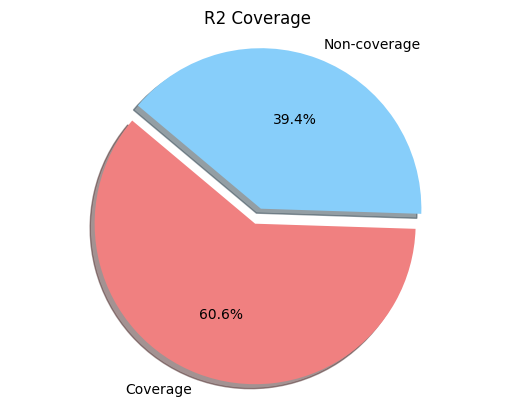


计算 Lin's CCC 统计量:
Lin's CCC 95%置信区间: (0.9984288242100996, 0.998987709267454)
总误差: (0.998152644146572, 0.9988388192655278); 随机误差: (0.9984288242100996, 0.998987709267454)
随机误差Lin's CCC在总误差内的概率: 0.75，覆盖率: 59.75%


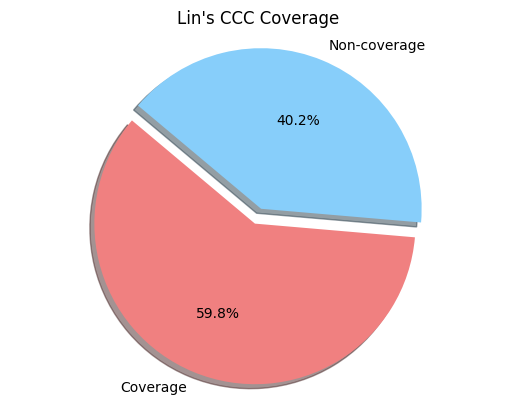


计算 ResidualError 统计量:
ResidualError 95%置信区间: (0.0012498182527431738, 0.0019556579510951063)
总误差: (0.0014386028663496682, 0.002287140977460618); 随机误差: (0.0012498182527431738, 0.0019556579510951063)
随机误差ResidualError在总误差内的概率: 0.75，覆盖率: 60.93%


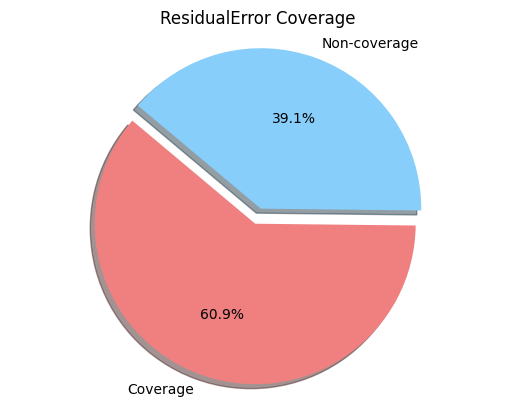

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from itertools import combinations

def calculate_coverage(interval1, interval2):
    L1, U1 = interval1
    L2, U2 = interval2
    L_overlap, U_overlap = max(L1, L2), min(U1, U2)
    if L_overlap > U_overlap:
        return 0.0
    overlap_length = U_overlap - L_overlap
    length1, length2 = U1 - L1, U2 - L2
    coverage = overlap_length / length1
    return coverage 

def calculate_statistics(data):
    return np.mean(data), np.var(data), np.std(data)

def calculate_confidence_interval(values, alpha=0.05):
    values = np.sort(values)
    lower_bound = np.percentile(values, alpha / 2 * 100)
    upper_bound = np.percentile(values, (1 - alpha / 2) * 100)
    return lower_bound, upper_bound

# def calculate_proportion(values, lower_bound, upper_bound):
#     return np.sum((values >= lower_bound) & (values <= upper_bound)) / len(values)
def calculate_proportion(values, lower_bound, upper_bound):
    # 确保 values 是一个一维数组或列表
    values = np.asarray(values).flatten()
    
    common_count = 0
    total_count = len(values)
    for value in values:
        if lower_bound <= value <= upper_bound:
            common_count += 1
            
    return common_count / total_count

def lins_ccc(x, y):
    mean_x, mean_y = np.mean(x), np.mean(y)
    var_x, var_y = np.var(x), np.var(y)
    cov_xy = np.mean((x - mean_x) * (y - mean_y))
    rho = cov_xy / np.sqrt(var_x * var_y)
    return (2 * rho * np.sqrt(var_x) * np.sqrt(var_y)) / (var_x + var_y + (mean_x - mean_y)**2)

def calcu_ResidualError(x, y):
    return np.mean((x - y)**2)

def monteCarloMethod(num_samples, data, stat_type):
    monteCarlo_values = []
    sampled_combinations = [np.random.choice(data.columns, 2, replace=False) for _ in range(num_samples)]
    for i, j in sampled_combinations:
        if stat_type == "R2":
            monteCarlo_values.append(r2_score(data[i], data[j]))
        elif stat_type == "Lin's CCC":
            monteCarlo_values.append(lins_ccc(data[i], data[j]))
        elif stat_type == "ResidualError":
            monteCarlo_values.append(calcu_ResidualError(data[i], data[j]))
    return monteCarlo_values



# 定义要计算的统计量类型
stat_types = ["R2", "Lin's CCC", "ResidualError"]

for stat_type in stat_types:
    print(f"\n计算 {stat_type} 统计量:") 
    # 直接使用data_df进行蒙特卡洛抽样并计算统计量-------随机误差
    monteCarlo_values = monteCarloMethod(10000, data_df, stat_type)
    ci_low, ci_high = calculate_confidence_interval(monteCarlo_values)
    print(f"{stat_type} 95%置信区间: ({ci_low}, {ci_high})")
    
    # 计算原始数据与复现数据之间的统计检验量-------总误差
    if stat_type == "R2":
        real_values = [r2_score(data_df['Out0'], data_df[f'Out{i}']) for i in range(1, 1001)]
    elif stat_type == "Lin's CCC":
        real_values = [lins_ccc(data_df['Out0'], data_df[f'Out{i}']) for i in range(1, 1001)]
    elif stat_type == "ResidualError":
        real_values = [calcu_ResidualError(data_df['Out0'], data_df[f'Out{i}']) for i in range(1, 1001)]

    low, high = calculate_confidence_interval(real_values)
    ratio_original = calculate_proportion(monteCarlo_values, low, high)
    coverage = calculate_coverage((low, high), (ci_low, ci_high))
    
    print(f"总误差: {(low, high)}; 随机误差: {(ci_low, ci_high)}")
    print(f"随机误差{stat_type}在总误差内的概率: {ratio_original:.2f}，覆盖率: {coverage*100:.2f}%")
    
    # 绘制覆盖率的饼图
    fig, ax = plt.subplots()
    labels = ['Coverage', 'Non-coverage']
    sizes = [coverage, 1-coverage]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # 突出显示覆盖率
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
           shadow=True, startangle=140)
    ax.axis('equal')
    plt.title(f'{stat_type} Coverage')
    plt.show()

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
## --Prediction--
# 定义计算指标的函数
def calculate_metrics(true_values, predictions, p):
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    r2 = r2_score(true_values, predictions)
    n = len(true_values)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    sse = np.sum((true_values - predictions) ** 2)
    aic = n * np.log(sse / n) + 2 * (p)
    return mae, mape, rmse, r2, adj_r2, aic

p = 7  # 根据你的模型的自变量数量调整
metrics = calculate_metrics(df['Out0'], df['Out1'], p)


# 输出结果
print("Metrics: MAE, MAPE, RMSE, R2, Adj.R2, AIC")
print(metrics)

Metrics: MAE, MAPE, RMSE, R2, Adj.R2, AIC
(0.0287538488336295, 13.38542712716411, 0.04069954487090807, 0.9973290261480966, 0.997298723365336, -3987.922961411355)
